# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 11     |  |
| :-------------|:-------------|
| Jinzhou Mo| 6126537 |
| Thijs Spilt| 6540619 |
| Max van Spaendonck| 6579353 |

| Planning Groep: 111     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 11:45 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:30 |
| Pauze 1| 12:00 - 12:15 |
| Pauze 2| 15:30 - 15:45 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](sketch.jpg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

uitgewerkte criteria:
| Sensor | Toepassing | Criteria |
|:---|:---|:---|
| krachtsensor | stappenteller | sensor moet het verschil kunnen meten tussen 0N en 10N. Minimaal 0.1s tussen elk stap en minimaal 3 metingen tussen elk stap |
| LDR | Mate van lichtdoorlating lichtdoorlatende voorwerpen bepalen | De sensor moet minimaal verschillen van 1 lux kunnen detecteren. Waarbij het invallende licht tussen 1 en 5000 lux moet zijn |
| Hall sensor | afstandmeter | vaste sterkte van de magneet. vaste orientatie t.o.v de sensor. De meetbare afstanden moeten tussen 1mm en 20 mm zijn met een resolutie van 0.5 mm |

Groep 11 heeft gekozen voor de krachtsensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
 ![Alt](opstelling.jpg "schets student")
 er is een circuit te zien waarbij een knop en een druksensor aan de arduino verbonden zijn. voor deze meetopstelling was de code:
 s
const int buttonPin = 12;
const int analogInPin = A0;

int sensorValue = 0;
int outputValue = 0;
int buttonState = 0;
int steps = 0;

void setup() {
  Serial.begin(9600);
  pinMode(buttonPin, INPUT);
}

void loop() {
  int sensorValue = analogRead(A0);
  buttonState = digitalRead(buttonPin);
  if (buttonState == HIGH) {
    Serial.println(sensorValue);
  }
  delay(1);
}


dit zorgt ervoor dat de metingen alleen geregistreerd worden als de knop ingedrukt is. hierdoor kunnen we het ook gebruiken om een plot te maken van de sensorwaarde als we een aantal stappen zetten

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
De kracht
2. Over welk bereik ga je deze variabelen veranderen?
van 150 gram en 1100 gram
3. Wat ga je allemaal meten?
verschillende gewichten op dit interval
4. Hoeveel metingen ga je doen?
4 
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
ja indien de sensor duidelijk verschil kan meten tussen meerdere metingen tussen 150 en 1100 gram, kan deze ook een stap detecteren (omdat een stap meer kracht uitoefent dan 1kg)

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
dezelfde opstelling als in de schets. alleen is er een led in het circuit deze werd echter niet gebruikt. De fles werd met verschillende hoeveelheden water gevuld
 ![Alt](foto_opstelling.jpg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt

step_data = np.loadtxt('stap.csv', delimiter=',')
schuif_data = np.loadtxt('schuif.csv', delimiter=',')
stamp_data = np.loadtxt('stamp.csv', delimiter=',')

In [2]:
print(np.max(stamp_data))
print(np.max(schuif_data))
print(np.max(step_data))

952.0
992.0
996.0


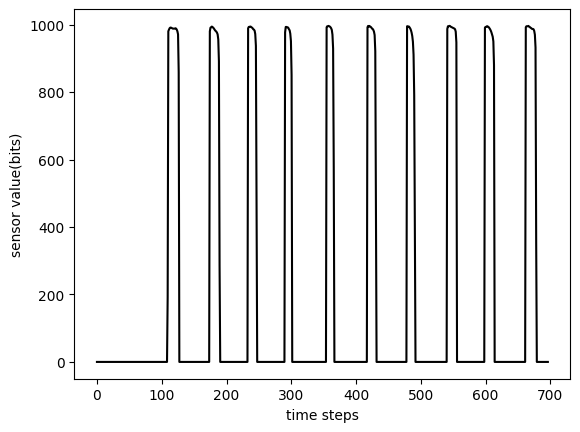

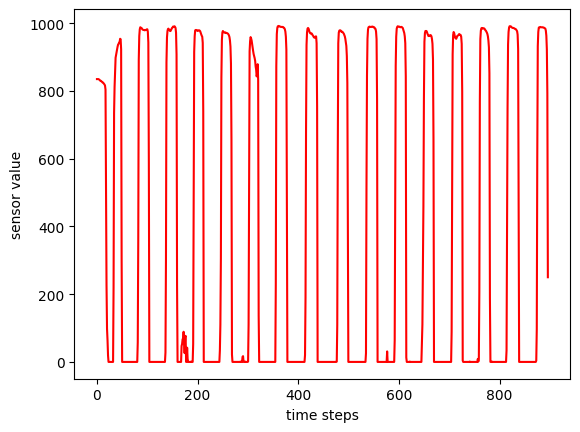

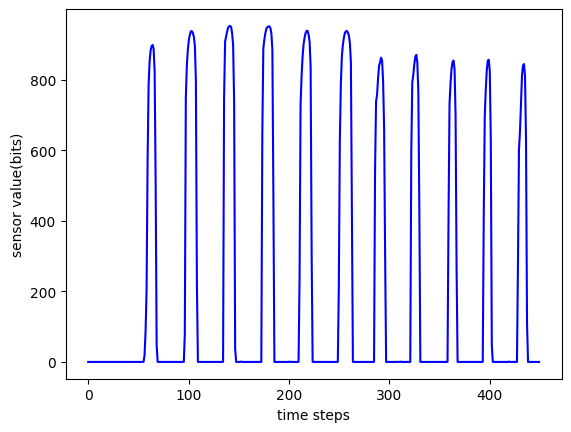

In [3]:
# we hebben hier met verschillende soorten stappen de meetwaardes geplot, om te kijken wat een geschikte drempelwaarde is voor het detecteren van eeen stap.
%matplotlib inline

steps = np.linspace(0,len(step_data), len(step_data))
steps_schuif = np.linspace(0,len(schuif_data), len(schuif_data))  
steps_stamp = np.linspace(0,len(stamp_data), len(stamp_data))  
plt.figure()
plt.plot(steps, step_data, 'k-')
plt.xlabel('time steps')
plt.ylabel('sensor value(bits)')
plt.show()

plt.figure()
plt.plot(steps_schuif, schuif_data, 'r-')
plt.xlabel('time steps')
plt.ylabel('sensor value')
plt.show()

plt.figure()
plt.plot(steps_stamp, stamp_data, 'b-')
plt.xlabel('time steps')
plt.ylabel('sensor value(bits)')
plt.show()


C:\Users\Muean\AppData\Local\Temp\ipykernel_18564\1893268679.py:7: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


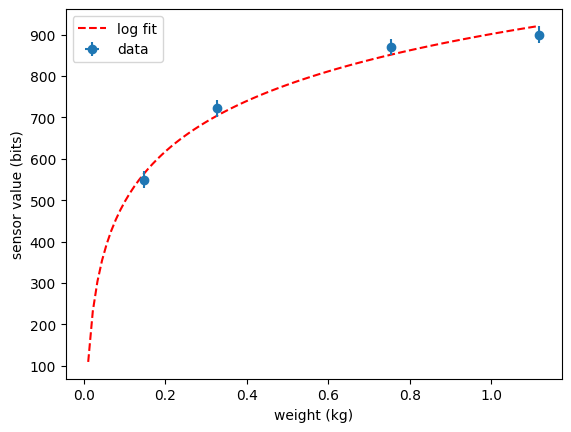

In [4]:
#fit van gewicht tegen de sensorwaarde. Er kan een logarimishc verband zijn. Dit toont nog meer aan dat er een minimale stap-kracht van ongeveer 1 kg nodig is om een stap te detecteren. 

from scipy.optimize import curve_fit
weights_data = np.loadtxt('weight_vs_sensor.csv', delimiter=',', skiprows=1)

def log_fit(x, a, b):
    return a * np.log(x) + b

val, cov = curve_fit(log_fit, weights_data[:,0], weights_data[:,1])
a_log, b_log = val
da_log, db_log = np.sqrt(np.diag(cov))

weight_range = np.linspace(0, np.max(weights_data[:,0]), 100)

plt.figure()
plt.plot(weight_range, log_fit(weight_range, a_log, b_log), 'r--', label='log fit')
# We zien dat de arduino waarde ongeveer 20 bits fluctueert bij elke meting, we nemen aan dat de fluctatie in weegschaal verwaarloosbaar is.
plt.errorbar(weights_data[:,0], weights_data[:,1], yerr=20, xerr = 0, fmt='o', label='data')
plt.xlabel('weight (kg)')
plt.ylabel('sensor value (bits)')
plt.legend()
plt.show()

## *Opdracht 7*: Iteratie nodig?

Ja. Ten eerste moet er een LED in het circuit verwerkt worden zodat te zien is of een stap is geregistreerd. De code moet ook aangepast worden. Tot nu toe werden de verkregen waarden geprint, nu moet het aantal stappen geprint worden bij elke stap. verder moet bepaald worden wat geregistreerd wordt en wat niet. Dit wordt gedaan door een onderdrempel en een bovendrempel te stellen. als de gemeten waarden boven de bovendrempel komen wordt een stap geregistreerd. Om nog een stap te registreren moet de gemeten waarde onder de onderdrempel komen. als de stap geregistreerd is moet dus de LED aangaan, dan moet een stap erbij geteld worden, dan moet het nieuwe aantal stappen geprint worden, en dan moet een cooldown geactiveerd worden. Als de waarde onder de onderdrempel gaat wordt de cooldown en de LED uitgezet, en wordt er na een kleine delay gelooped. Verder moet de draad waarmee de druksensor verbonden is aan de breadboard ook langer gemaakt worden (1.2m zodat hij door iedereen gebruikt kan worden).

const int ledPin = 13;
const int buttonPin = 12;
const int analogInPin = A0;
const int thresholdh = 900;
const int thresholdl = 10;

unsigned long steps = 0;
bool cooldown = false;
bool active = false;

int sensorValue = 0;
int outputValue = 0;
int buttonState = 0;
int lastButtonState = LOW;


void setup() {
  Serial.begin(9600);
  pinMode(ledPin, OUTPUT);
  pinMode(buttonPin, INPUT);
}

void loop() {
  int sensorValue = analogRead(analogInPin);
  buttonState = digitalRead(buttonPin);
  digitalWrite(ledPin, LOW);

  if (buttonState == HIGH && lastButtonState == LOW) {
    active = !active;
    Serial.print("Active: ");
    Serial.println(active);
    delay(200);
  }
  lastButtonState = buttonState;

  if (active) {
    if (sensorValue > thresholdh && !cooldown) {
      digitalWrite(ledPin, HIGH);
      steps++;
      Serial.println(steps);
      cooldown = true;
    }
    if (sensorValue < thresholdl && cooldown) {
      digitalWrite(ledPin, LOW);
      cooldown = false;
      delay(1);
    }
  }
}

## *Opdracht 8*: Conclusie, leerdoel

De druksensor is wel geschikt om te gebruiken als stappenteller. De sensor meet namelijk vrij snel en consistent, en kan duidelijk een verschil tussen een gewicht van 1 kg en 0 kg waarnemen, dus kan beredeneerd worden of een stap wordt gemaakt. Het gebruik van de breadboard en arduino zorgt wel dat veel ruimte wordt opgenomen, en er is ook een computer nodig om te zien hoeveel stappen zijn genomen. Het is dus onhandig om het systeem dat wij hebben gemaakt te gebruiken als stappenteller, maar dit ligt niet aan de sensor.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
 ![Alt](opstelling.jpg "schets student")
 er is een circuit te zien waarbij een knop en een druksensor aan de arduino verbonden zijn. voor deze meetopstelling was de code:
 s
const int buttonPin = 12;
const int analogInPin = A0;

int sensorValue = 0;
int outputValue = 0;
int buttonState = 0;
int steps = 0;

void setup() {
  Serial.begin(9600);
  pinMode(buttonPin, INPUT);
}

void loop() {
  int sensorValue = analogRead(A0);
  buttonState = digitalRead(buttonPin);
  if (buttonState == HIGH) {
    Serial.println(sensorValue);
  }
  delay(1);
}


dit zorgt ervoor dat de metingen alleen geregistreerd worden als de knop ingedrukt is. hierdoor kunnen we het ook gebruiken om een plot te maken van de sensorwaarde als we een aantal stappen zetten

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
dezelfde opstelling als in de schets. alleen is er een led in het circuit deze werd echter niet gebruikt. De fles werd met verschillende hoeveelheden water gevuld
 ![Alt](foto_opstelling.jpg "meetopstelling student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

uitgewerkte criteria:
| Sensor | Toepassing | Criteria |
|:---|:---|:---|
| krachtsensor | stappenteller | sensor moet het verschil kunnen meten tussen 0N en 10N. Minimaal 0.1s tussen elk stap en minimaal 3 metingen tussen elk stap |
| LDR | Mate van lichtdoorlating lichtdoorlatende voorwerpen bepalen | De sensor moet minimaal verschillen van 1 lux kunnen detecteren. Waarbij het invallende licht tussen 1 en 5000 lux moet zijn |
| Hall sensor | afstandmeter | vaste sterkte van de magneet. vaste orientatie t.o.v de sensor. De meetbare afstanden moeten tussen 1mm en 20 mm zijn met een resolutie van 0.5 mm |

Groep 11 heeft gekozen voor de krachtsensor. 

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
 ![Alt](opstelling.jpg "schets student")
 er is een circuit te zien waarbij een knop en een druksensor aan de arduino verbonden zijn. voor deze meetopstelling was de code:
 s
const int buttonPin = 12;
const int analogInPin = A0;

int sensorValue = 0;
int outputValue = 0;
int buttonState = 0;
int steps = 0;

void setup() {
  Serial.begin(9600);
  pinMode(buttonPin, INPUT);
}

void loop() {
  int sensorValue = analogRead(A0);
  buttonState = digitalRead(buttonPin);
  if (buttonState == HIGH) {
    Serial.println(sensorValue);
  }
  delay(1);
}


dit zorgt ervoor dat de metingen alleen geregistreerd worden als de knop ingedrukt is. hierdoor kunnen we het ook gebruiken om een plot te maken van de sensorwaarde als we een aantal stappen zetten

## *Opdracht 8*: Conclusie, leerdoel

De druksensor is wel geschikt om te gebruiken als stappenteller. De sensor meet namelijk vrij snel en consistent, en kan duidelijk een verschil tussen een gewicht van 1 kg en 0 kg waarnemen, dus kan beredeneerd worden of een stap wordt gemaakt. Het gebruik van de breadboard en arduino zorgt wel dat veel ruimte wordt opgenomen, en er is ook een computer nodig om te zien hoeveel stappen zijn genomen. Het is dus onhandig om het systeem dat wij hebben gemaakt te gebruiken als stappenteller, maar dit ligt niet aan de sensor.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
dezelfde opstelling als in de schets. alleen is er een led in het circuit deze werd echter niet gebruikt. De fles werd met verschillende hoeveelheden water gevuld
 ![Alt](foto_opstelling.jpg "meetopstelling student")

C:\Users\Muean\AppData\Local\Temp\ipykernel_18564\925077483.py:7: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


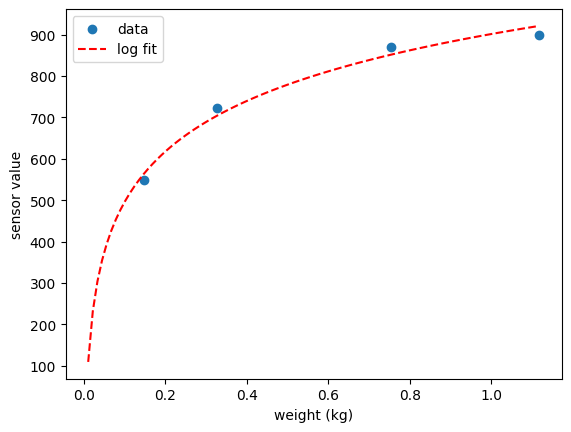

In [5]:
#fit van gewicht tegen de sensorwaarde. Er kan een logarimishc verband zijn. Dit toont nog meer aan dat er een minimale stap-kracht van ongeveer 1 kg nodig is om een stap te detecteren. 

from scipy.optimize import curve_fit
weights_data = np.loadtxt('weight_vs_sensor.csv', delimiter=',', skiprows=1)

def log_fit(x, a, b): 
    return a * np.log(x) + b

val, cov = curve_fit(log_fit, weights_data[:,0], weights_data[:,1])
a_log, b_log = val
da_log, db_log = np.sqrt(np.diag(cov))

weight_range = np.linspace(0, np.max(weights_data[:,0]), 100)

plt.figure()
plt.scatter(weights_data[:,0], weights_data[:,1], label='data')
plt.plot(weight_range, log_fit(weight_range, a_log, b_log), 'r--', label='log fit')
plt.xlabel('weight (kg)')
plt.ylabel('sensor value')
plt.legend()
plt.show()